# Check GPU devices

In [ ]:
!nvidia-smi

# Download Code, Data and Install Libraries

We did not build CycleGAN code from scratch. Instead, we borrowed the code from the paper author, and start measure complexity from there. 

Download code from the author.

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Install all necessary libraries.

In [ ]:
!pip install -r requirements.txt

Download datset from official website. This data is originally from Imagenet data with specified labels. 

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra


To run inference, you must have a pretrained Cycle GAN model that could map your source image into the target domain. You have 2 options to get the pretrained model.

1. train it yourself. and then add the model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`
2. download the official pretrained models with the following bash script.


In [ ]:
# !bash ./scripts/download_cyclegan_model.sh horse2zebra

# Training


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

# Inference 

In [1]:
# check inference time for a bunch of images. Note that this is the time for 10 images.
import time 
start_time = time.time() 

In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

In [ ]:
print(time.time() - start_time)

73.11440086364746


Let's check the results. 

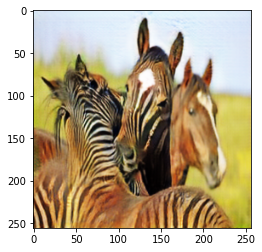

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.imshow(img)

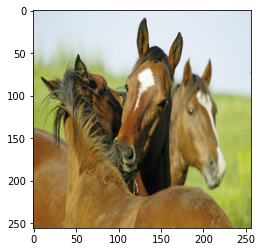

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)

# Complexity Measure


- time complexity: we use nvprof to get FLOPS
- mem complexity: the training log has already yielded model sizes and # params. 

In [ ]:
!nvprof --metrics count_flop_sp \
--csv --log-file cycle_gan_flop.csv \
python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout